In [59]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
train_path = r"C:\Users\SHUBHAM\Desktop\plant_village_dataset\PlantVillage-Dataset-master\raw\color"
test_path = "images/test/"
batch_size = 32
image_size = 128
num_class = 29

In [62]:
train_datagen = ImageDataGenerator(validation_split = 0.2,
                                           rescale = 1./255
                                           
                                            )
train_generator = train_datagen.flow_from_directory(directory = train_path , batch_size = batch_size)
validation_generator = train_datagen.flow_from_directory(directory = train_path , batch_size = batch_size)

Found 54305 images belonging to 38 classes.
Found 54305 images belonging to 38 classes.


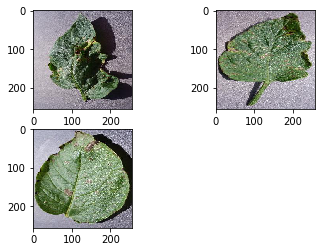

In [63]:
x_batch , _ = train_generator.next()
fig = plt.figure()
column = 2
row = 2
for i in range (1, column*row):
    num = np.random.randint(batch_size)
    image = x_batch[num].astype(np.float)
    fig.add_subplot(row,column,i)
    plt.imshow(image)

In [64]:
p = []
for i in range(38):
    p.append(list(train_generator.labels).count(i))
    print(str(i)+":"+str(p[i]))

0:630
1:621
2:275
3:1645
4:1502
5:1052
6:854
7:513
8:1192
9:985
10:1162
11:1180
12:1383
13:1076
14:423
15:5507
16:2297
17:360
18:997
19:1478
20:1000
21:1000
22:152
23:371
24:5090
25:1835
26:1109
27:456
28:2127
29:1000
30:1909
31:952
32:1771
33:1676
34:1404
35:5357
36:373
37:1591


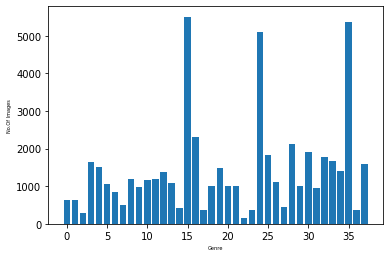

In [65]:
index = p
plt.bar(range(38),index)
plt.xlabel('Genre',fontsize = 5)
plt.ylabel('No.Of Images', fontsize = 5)
plt.show()

In [66]:
for i,j in zip(train_generator.class_indices,p):
    print(i)
    print(j)

Apple___Apple_scab
630
Apple___Black_rot
621
Apple___Cedar_apple_rust
275
Apple___healthy
1645
Blueberry___healthy
1502
Cherry_(including_sour)___Powdery_mildew
1052
Cherry_(including_sour)___healthy
854
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
513
Corn_(maize)___Common_rust_
1192
Corn_(maize)___Northern_Leaf_Blight
985
Corn_(maize)___healthy
1162
Grape___Black_rot
1180
Grape___Esca_(Black_Measles)
1383
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
1076
Grape___healthy
423
Orange___Haunglongbing_(Citrus_greening)
5507
Peach___Bacterial_spot
2297
Peach___healthy
360
Pepper,_bell___Bacterial_spot
997
Pepper,_bell___healthy
1478
Potato___Early_blight
1000
Potato___Late_blight
1000
Potato___healthy
152
Raspberry___healthy
371
Soybean___healthy
5090
Squash___Powdery_mildew
1835
Strawberry___Leaf_scorch
1109
Strawberry___healthy
456
Tomato___Bacterial_spot
2127
Tomato___Early_blight
1000
Tomato___Late_blight
1909
Tomato___Leaf_Mold
952
Tomato___Septoria_leaf_spot
1771
Tomato___Spider_

In [67]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [68]:
import tensorflow.keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [69]:
base_model = InceptionV3(weights='imagenet' , include_top = False , input_shape = (image_size, image_size,3))

In [70]:
x_batch, Y_batch = train_generator.next()

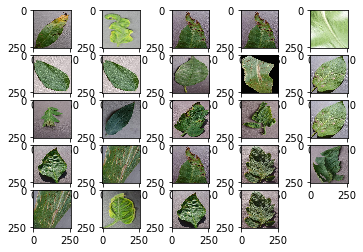

In [71]:
fig = plt.figure()
column = 5 
row = 5
for i in range (1, column*row):
    num = np.random.randint(batch_size)
    image = x_batch[num].astype(np.float)
    fig.add_subplot(row,column,i)
    plt.imshow(image)

In [72]:
print(base_model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 63, 63, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 63, 63, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [73]:
model = tf.keras.models.Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='sigmoid'))
model.add(Dense(num_class, activation='softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])



model.fit_generator(
train_generator,
steps_per_epoch = train_generator.samples// batch_size,validation_data = validation_generator, validation_steps = validation_generator.samples// batch_size,epochs=40)




from keras import backend as K
K.tensorflow_backend._get_available_gpus()



model.save('scratch_model.h5')
print("Model Saved")



get_ipython().system('conda install h5py')



model.metrics[1]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 29)                29725     
Total params: 31,271,741
Trainable params: 31,237,309
Non-trainable params: 34,432
_________________________________________________________________
None
Epoch 1/40


ValueError: Error when checking input: expected inception_v3_input to have shape (128, 128, 3) but got array with shape (256, 256, 3)